In [11]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-dark")

C:\Users\komno\AppData\Local\Temp\ipykernel_19856\287168634.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark")


In [3]:
df = pd.read_csv("salaries.csv")

**Description of the features in dataset:**
- work_year: The year in which the salary data was collected (e.g., 2024).
- employment_type: The type of employment (e.g., FT for Full-Time).
- experience_level: The level of experience of the employee (e.g., MI for Mid-Level).
- job_title: The title of the job (e.g., Data Scientist).
- salary: The salary amount.
- salary_currency: The currency in which the salary is denominated (e.g., USD for US Dollars).
- salary_in_usd: The salary amount converted to US Dollars.
- employee_residence: The country of residence of the employee (e.g., AU for Australia).
- remote_ratio: The ratio indicating the level of remote work (0 for no remote work).
- company_location: The location of the company (e.g., AU for Australia).
- company_size: The size of the company (e.g., S for Small).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [26]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


### What is the distribution of salaries across different experience levels?

<Axes: title={'center': 'Total Salaries by Experience Level'}, xlabel='Experience Level', ylabel='Total Salary in USD'>

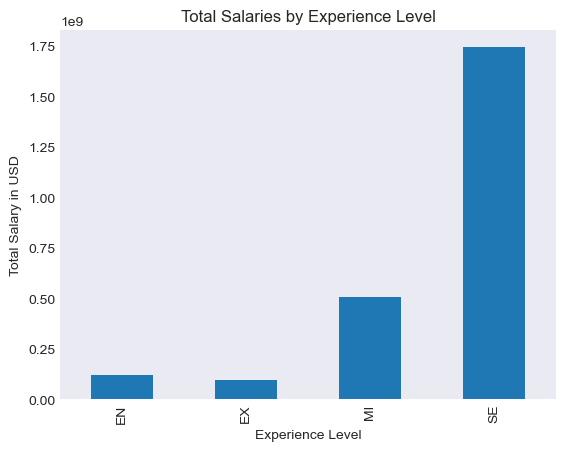

In [24]:
df.groupby(as_index=False, by="experience_level").agg({"salary_in_usd": "sum"}).plot(
    kind="bar",
    x="experience_level",
    y="salary_in_usd",
    title="Total Salaries by Experience Level",
    xlabel="Experience Level",
    ylabel="Total Salary in USD",
    legend=False,
)


### Is there a correlation between remote work ratio and salary?

In [16]:
df[["remote_ratio", "salary_in_usd"]].corr()

,remote_ratio,salary_in_usd
remote_ratio,1.000000,-0.057695
salary_in_usd,-0.057695,1.000000


### How does salary vary based on employment type?

<Axes: title={'center': 'Mean and Median Salary by Employment Type'}, xlabel='Employment Type', ylabel='Salary in USD'>

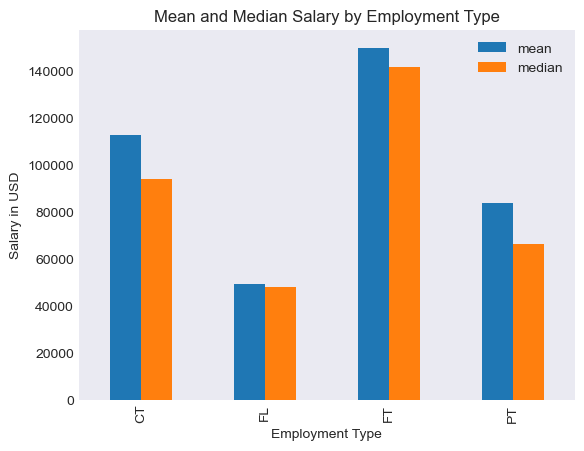

In [22]:
df.groupby(as_index=False, by="employment_type").agg(
    {"salary_in_usd": ["mean", "median"]}
).plot(
    kind="bar",
    x="employment_type",
    y="salary_in_usd",
    title="Mean and Median Salary by Employment Type",
    ylabel="Salary in USD",
    xlabel="Employment Type"
)

### How does salary distribution vary among different job titles?

<Axes: title={'center': 'Top 10 Jobs by Salary'}>

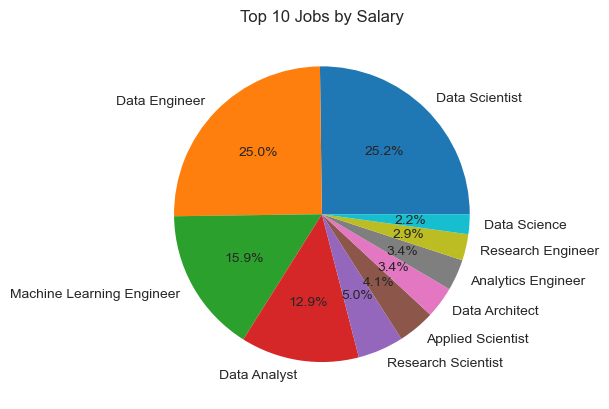

In [44]:
top_jobs_df = (
    df.groupby(as_index=False, by="job_title")
    .agg({"salary_in_usd": "sum"})
    .nlargest(10, "salary_in_usd")
)
top_jobs_df.plot(
    kind="pie",
    title="Top 10 Jobs by Salary",
    y="salary_in_usd",
    ylabel="",
    labels=top_jobs_df["job_title"],
    autopct="%1.1f%%",
    legend=None,
)
